# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.68027204961e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [4]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print("your loss is: ", loss)
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

your loss is:  1.30378789133
Difference between your loss and correct loss:
1.79856129989e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [6]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.561318e-09
b1 max relative error: 8.372512e-10
b2 max relative error: 4.447656e-11
W2 max relative error: 3.440708e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.0171496079387


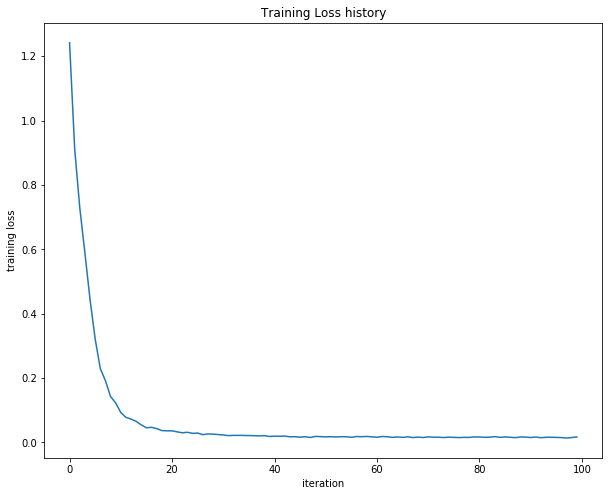

In [7]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [7]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [8]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 1000: loss 2.302762
iteration 100 / 1000: loss 2.302358
iteration 200 / 1000: loss 2.297404
iteration 300 / 1000: loss 2.258897
iteration 400 / 1000: loss 2.202975
iteration 500 / 1000: loss 2.116816
iteration 600 / 1000: loss 2.049789
iteration 700 / 1000: loss 1.985711
iteration 800 / 1000: loss 2.003726
iteration 900 / 1000: loss 1.948076
Validation accuracy:  0.287


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

** One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.**

Another strategy is to **visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.**

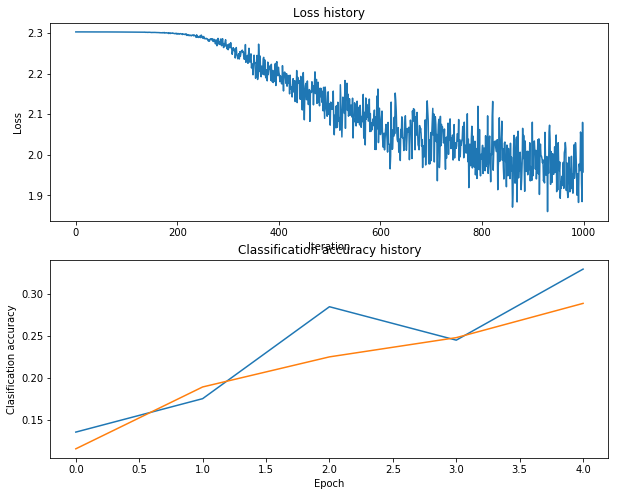

In [9]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

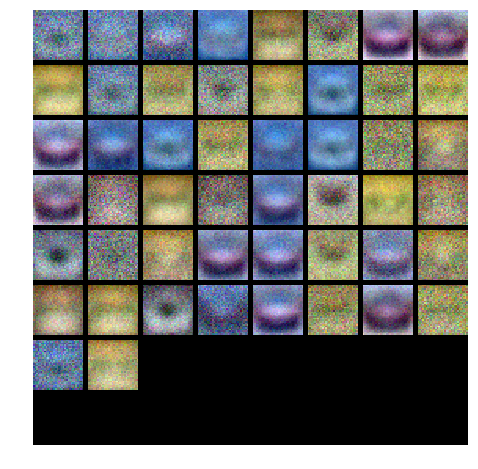

In [10]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, **we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.**

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including **hidden layer size, learning rate, numer of training epochs, and regularization strength.** You might also consider tuning the **learning rate decay**, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [16]:
import time

best_net = None # store the best model into this 
best_val = -1
#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
input_size = 32 * 32 * 3
num_classes = 10

learning_rates = [5e-4, 1e-3, 2e-3]
hidden_layer_size = [70, 100, 120, 150]
num_iters = [1500, 2000, 2500, 3000]
regularization_strength = [0.25, 0.5, 0.75, 1, 1.25, 1.5]

start = time.time()

for hls in hidden_layer_size:
    for it in num_iters:
        for strength in regularization_strength:
            for lr in learning_rates:
                net = TwoLayerNet(input_size, hls, num_classes)
                stats = net.train(X_train, y_train, X_val, y_val,
                                 num_iters=it, batch_size=200,
                                 learning_rate=lr, learning_rate_decay=0.95,
                                 reg=strength, verbose=True)
                val_acc = np.mean(net.predict(X_val) == y_val)
                if val_acc > best_val:
                    best_val = val_acc
                    best_net = net
                    print("======================================================================")
                    print("Current best net is hidden: {0}, iters: {1}, strength: {2}, learning_rate: {3}"
                          .format(hls, it, strength, lr))
                    print("Current best validation accuracy is {0}".format(best_val))
                    print("======================================================================")

end = time.time()
print("GridSearch computed in {0}fs".format(end - start))
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

iteration 0 / 1500: loss 2.302870
iteration 100 / 1500: loss 2.068804
iteration 200 / 1500: loss 1.945716
iteration 300 / 1500: loss 1.870996
iteration 400 / 1500: loss 1.811998
iteration 500 / 1500: loss 1.749220
iteration 600 / 1500: loss 1.843147
iteration 700 / 1500: loss 1.720479
iteration 800 / 1500: loss 1.568317
iteration 900 / 1500: loss 1.481535
iteration 1000 / 1500: loss 1.581799
iteration 1100 / 1500: loss 1.427340
iteration 1200 / 1500: loss 1.538492
iteration 1300 / 1500: loss 1.511419
iteration 1400 / 1500: loss 1.534840
Current best net is hidden: 70, iters: 1500, strength: 0.25, learning_rate: 0.0005
Current best validation accuracy is 0.467
iteration 0 / 1500: loss 2.302838
iteration 100 / 1500: loss 1.882505
iteration 200 / 1500: loss 1.795321
iteration 300 / 1500: loss 1.738115
iteration 400 / 1500: loss 1.573895
iteration 500 / 1500: loss 1.645293
iteration 600 / 1500: loss 1.639705
iteration 700 / 1500: loss 1.424325
iteration 800 / 1500: loss 1.531004
iteration 

iteration 1000 / 1500: loss 1.521406
iteration 1100 / 1500: loss 1.570015
iteration 1200 / 1500: loss 1.627412
iteration 1300 / 1500: loss 1.744021
iteration 1400 / 1500: loss 1.572327
iteration 0 / 1500: loss 2.303921
iteration 100 / 1500: loss 1.765027
iteration 200 / 1500: loss 1.774833
iteration 300 / 1500: loss 1.754511
iteration 400 / 1500: loss 1.812415
iteration 500 / 1500: loss 1.647018
iteration 600 / 1500: loss 1.643102
iteration 700 / 1500: loss 1.615013
iteration 800 / 1500: loss 1.559137
iteration 900 / 1500: loss 1.656523
iteration 1000 / 1500: loss 1.562640
iteration 1100 / 1500: loss 1.563271
iteration 1200 / 1500: loss 1.637485
iteration 1300 / 1500: loss 1.591960
iteration 1400 / 1500: loss 1.466260
iteration 0 / 1500: loss 2.304193
iteration 100 / 1500: loss 2.115714
iteration 200 / 1500: loss 2.001081
iteration 300 / 1500: loss 1.882318
iteration 400 / 1500: loss 1.903415
iteration 500 / 1500: loss 1.805550
iteration 600 / 1500: loss 1.683816
iteration 700 / 1500: 

iteration 600 / 2000: loss 1.638011
iteration 700 / 2000: loss 1.526997
iteration 800 / 2000: loss 1.472306
iteration 900 / 2000: loss 1.620160
iteration 1000 / 2000: loss 1.447929
iteration 1100 / 2000: loss 1.585031
iteration 1200 / 2000: loss 1.438701
iteration 1300 / 2000: loss 1.478852
iteration 1400 / 2000: loss 1.561940
iteration 1500 / 2000: loss 1.477346
iteration 1600 / 2000: loss 1.546417
iteration 1700 / 2000: loss 1.446681
iteration 1800 / 2000: loss 1.436595
iteration 1900 / 2000: loss 1.427476
iteration 0 / 2000: loss 2.303385
iteration 100 / 2000: loss 1.806284
iteration 200 / 2000: loss 1.619706
iteration 300 / 2000: loss 1.616094
iteration 400 / 2000: loss 1.548494
iteration 500 / 2000: loss 1.734298
iteration 600 / 2000: loss 1.597704
iteration 700 / 2000: loss 1.670485
iteration 800 / 2000: loss 1.664891
iteration 900 / 2000: loss 1.688089
iteration 1000 / 2000: loss 1.650481
iteration 1100 / 2000: loss 1.564789
iteration 1200 / 2000: loss 1.552410
iteration 1300 / 

iteration 400 / 2500: loss 1.763196
iteration 500 / 2500: loss 1.655780
iteration 600 / 2500: loss 1.688039
iteration 700 / 2500: loss 1.652935
iteration 800 / 2500: loss 1.620587
iteration 900 / 2500: loss 1.630031
iteration 1000 / 2500: loss 1.682223
iteration 1100 / 2500: loss 1.509598
iteration 1200 / 2500: loss 1.534417
iteration 1300 / 2500: loss 1.556044
iteration 1400 / 2500: loss 1.625335
iteration 1500 / 2500: loss 1.485490
iteration 1600 / 2500: loss 1.509488
iteration 1700 / 2500: loss 1.590038
iteration 1800 / 2500: loss 1.497661
iteration 1900 / 2500: loss 1.439569
iteration 2000 / 2500: loss 1.450474
iteration 2100 / 2500: loss 1.448523
iteration 2200 / 2500: loss 1.311208
iteration 2300 / 2500: loss 1.395768
iteration 2400 / 2500: loss 1.362338
iteration 0 / 2500: loss 2.302853
iteration 100 / 2500: loss 2.016982
iteration 200 / 2500: loss 1.736511
iteration 300 / 2500: loss 1.683618
iteration 400 / 2500: loss 1.664014
iteration 500 / 2500: loss 1.539397
iteration 600 /

iteration 1400 / 2500: loss 1.598472
iteration 1500 / 2500: loss 1.368182
iteration 1600 / 2500: loss 1.584750
iteration 1700 / 2500: loss 1.539488
iteration 1800 / 2500: loss 1.396901
iteration 1900 / 2500: loss 1.585959
iteration 2000 / 2500: loss 1.356128
iteration 2100 / 2500: loss 1.554462
iteration 2200 / 2500: loss 1.454435
iteration 2300 / 2500: loss 1.437390
iteration 2400 / 2500: loss 1.475566
iteration 0 / 2500: loss 2.303675
iteration 100 / 2500: loss 2.130160
iteration 200 / 2500: loss 2.029772
iteration 300 / 2500: loss 1.800914
iteration 400 / 2500: loss 1.780328
iteration 500 / 2500: loss 1.817880
iteration 600 / 2500: loss 1.821254
iteration 700 / 2500: loss 1.767137
iteration 800 / 2500: loss 1.697205
iteration 900 / 2500: loss 1.607357
iteration 1000 / 2500: loss 1.638442
iteration 1100 / 2500: loss 1.665123
iteration 1200 / 2500: loss 1.513091
iteration 1300 / 2500: loss 1.633934
iteration 1400 / 2500: loss 1.648733
iteration 1500 / 2500: loss 1.731691
iteration 160

iteration 1400 / 2500: loss 1.757488
iteration 1500 / 2500: loss 1.634949
iteration 1600 / 2500: loss 1.632842
iteration 1700 / 2500: loss 1.608952
iteration 1800 / 2500: loss 1.644071
iteration 1900 / 2500: loss 1.585432
iteration 2000 / 2500: loss 1.601842
iteration 2100 / 2500: loss 1.559377
iteration 2200 / 2500: loss 1.512474
iteration 2300 / 2500: loss 1.578517
iteration 2400 / 2500: loss 1.601457
iteration 0 / 3000: loss 2.302854
iteration 100 / 3000: loss 2.088644
iteration 200 / 3000: loss 1.963408
iteration 300 / 3000: loss 1.800715
iteration 400 / 3000: loss 1.781411
iteration 500 / 3000: loss 1.686686
iteration 600 / 3000: loss 1.731757
iteration 700 / 3000: loss 1.657154
iteration 800 / 3000: loss 1.681199
iteration 900 / 3000: loss 1.790412
iteration 1000 / 3000: loss 1.549574
iteration 1100 / 3000: loss 1.488126
iteration 1200 / 3000: loss 1.504259
iteration 1300 / 3000: loss 1.593031
iteration 1400 / 3000: loss 1.443385
iteration 1500 / 3000: loss 1.427502
iteration 160

iteration 1900 / 3000: loss 1.466988
iteration 2000 / 3000: loss 1.554744
iteration 2100 / 3000: loss 1.371630
iteration 2200 / 3000: loss 1.503430
iteration 2300 / 3000: loss 1.550245
iteration 2400 / 3000: loss 1.523336
iteration 2500 / 3000: loss 1.411363
iteration 2600 / 3000: loss 1.480655
iteration 2700 / 3000: loss 1.513150
iteration 2800 / 3000: loss 1.498178
iteration 2900 / 3000: loss 1.536452
iteration 0 / 3000: loss 2.303392
iteration 100 / 3000: loss 2.013555
iteration 200 / 3000: loss 1.707985
iteration 300 / 3000: loss 1.780006
iteration 400 / 3000: loss 1.569645
iteration 500 / 3000: loss 1.617427
iteration 600 / 3000: loss 1.600517
iteration 700 / 3000: loss 1.694680
iteration 800 / 3000: loss 1.531890
iteration 900 / 3000: loss 1.645712
iteration 1000 / 3000: loss 1.523393
iteration 1100 / 3000: loss 1.585554
iteration 1200 / 3000: loss 1.482393
iteration 1300 / 3000: loss 1.373888
iteration 1400 / 3000: loss 1.435422
iteration 1500 / 3000: loss 1.515611
iteration 160

iteration 300 / 3000: loss 1.701270
iteration 400 / 3000: loss 1.868676
iteration 500 / 3000: loss 1.602233
iteration 600 / 3000: loss 1.555896
iteration 700 / 3000: loss 1.510733
iteration 800 / 3000: loss 1.734336
iteration 900 / 3000: loss 1.651171
iteration 1000 / 3000: loss 1.548295
iteration 1100 / 3000: loss 1.599608
iteration 1200 / 3000: loss 1.551061
iteration 1300 / 3000: loss 1.527573
iteration 1400 / 3000: loss 1.613552
iteration 1500 / 3000: loss 1.550615
iteration 1600 / 3000: loss 1.644828
iteration 1700 / 3000: loss 1.682014
iteration 1800 / 3000: loss 1.636807
iteration 1900 / 3000: loss 1.606400
iteration 2000 / 3000: loss 1.576183
iteration 2100 / 3000: loss 1.476028
iteration 2200 / 3000: loss 1.450998
iteration 2300 / 3000: loss 1.657905
iteration 2400 / 3000: loss 1.577548
iteration 2500 / 3000: loss 1.571048
iteration 2600 / 3000: loss 1.552401
iteration 2700 / 3000: loss 1.463698
iteration 2800 / 3000: loss 1.494767
iteration 2900 / 3000: loss 1.599712
iteratio

iteration 300 / 1500: loss 1.691617
iteration 400 / 1500: loss 1.693519
iteration 500 / 1500: loss 1.653173
iteration 600 / 1500: loss 1.569337
iteration 700 / 1500: loss 1.626947
iteration 800 / 1500: loss 1.580702
iteration 900 / 1500: loss 1.592517
iteration 1000 / 1500: loss 1.508805
iteration 1100 / 1500: loss 1.561455
iteration 1200 / 1500: loss 1.458256
iteration 1300 / 1500: loss 1.538253
iteration 1400 / 1500: loss 1.644478
iteration 0 / 1500: loss 2.303770
iteration 100 / 1500: loss 1.765651
iteration 200 / 1500: loss 1.637946
iteration 300 / 1500: loss 1.661916
iteration 400 / 1500: loss 1.641015
iteration 500 / 1500: loss 1.554444
iteration 600 / 1500: loss 1.694788
iteration 700 / 1500: loss 1.636723
iteration 800 / 1500: loss 1.507277
iteration 900 / 1500: loss 1.463955
iteration 1000 / 1500: loss 1.400971
iteration 1100 / 1500: loss 1.545513
iteration 1200 / 1500: loss 1.535357
iteration 1300 / 1500: loss 1.568096
iteration 1400 / 1500: loss 1.611270
iteration 0 / 1500: 

iteration 400 / 2000: loss 1.832146
iteration 500 / 2000: loss 1.914569
iteration 600 / 2000: loss 1.659883
iteration 700 / 2000: loss 1.636413
iteration 800 / 2000: loss 1.651460
iteration 900 / 2000: loss 1.682573
iteration 1000 / 2000: loss 1.738349
iteration 1100 / 2000: loss 1.545148
iteration 1200 / 2000: loss 1.488638
iteration 1300 / 2000: loss 1.529620
iteration 1400 / 2000: loss 1.442362
iteration 1500 / 2000: loss 1.545521
iteration 1600 / 2000: loss 1.519019
iteration 1700 / 2000: loss 1.391353
iteration 1800 / 2000: loss 1.575460
iteration 1900 / 2000: loss 1.509046
iteration 0 / 2000: loss 2.303365
iteration 100 / 2000: loss 1.853061
iteration 200 / 2000: loss 1.778014
iteration 300 / 2000: loss 1.709095
iteration 400 / 2000: loss 1.600536
iteration 500 / 2000: loss 1.667922
iteration 600 / 2000: loss 1.455876
iteration 700 / 2000: loss 1.584134
iteration 800 / 2000: loss 1.609256
iteration 900 / 2000: loss 1.566500
iteration 1000 / 2000: loss 1.468614
iteration 1100 / 20

iteration 1000 / 2000: loss 1.583284
iteration 1100 / 2000: loss 1.712149
iteration 1200 / 2000: loss 1.579954
iteration 1300 / 2000: loss 1.628436
iteration 1400 / 2000: loss 1.637502
iteration 1500 / 2000: loss 1.597047
iteration 1600 / 2000: loss 1.628412
iteration 1700 / 2000: loss 1.647311
iteration 1800 / 2000: loss 1.603741
iteration 1900 / 2000: loss 1.593947
iteration 0 / 2000: loss 2.304849
iteration 100 / 2000: loss 2.159323
iteration 200 / 2000: loss 1.952462
iteration 300 / 2000: loss 1.848856
iteration 400 / 2000: loss 1.765081
iteration 500 / 2000: loss 1.890892
iteration 600 / 2000: loss 1.812836
iteration 700 / 2000: loss 1.757419
iteration 800 / 2000: loss 1.681617
iteration 900 / 2000: loss 1.583620
iteration 1000 / 2000: loss 1.736945
iteration 1100 / 2000: loss 1.547365
iteration 1200 / 2000: loss 1.746797
iteration 1300 / 2000: loss 1.661782
iteration 1400 / 2000: loss 1.733897
iteration 1500 / 2000: loss 1.581497
iteration 1600 / 2000: loss 1.596814
iteration 170

iteration 1500 / 2500: loss 1.405994
iteration 1600 / 2500: loss 1.441691
iteration 1700 / 2500: loss 1.399552
iteration 1800 / 2500: loss 1.314905
iteration 1900 / 2500: loss 1.392226
iteration 2000 / 2500: loss 1.415851
iteration 2100 / 2500: loss 1.396675
iteration 2200 / 2500: loss 1.349167
iteration 2300 / 2500: loss 1.444003
iteration 2400 / 2500: loss 1.371811
iteration 0 / 2500: loss 2.303719
iteration 100 / 2500: loss 2.096997
iteration 200 / 2500: loss 1.938661
iteration 300 / 2500: loss 1.799298
iteration 400 / 2500: loss 1.778543
iteration 500 / 2500: loss 1.674818
iteration 600 / 2500: loss 1.779523
iteration 700 / 2500: loss 1.685050
iteration 800 / 2500: loss 1.612136
iteration 900 / 2500: loss 1.615372
iteration 1000 / 2500: loss 1.710213
iteration 1100 / 2500: loss 1.655588
iteration 1200 / 2500: loss 1.575401
iteration 1300 / 2500: loss 1.515723
iteration 1400 / 2500: loss 1.557502
iteration 1500 / 2500: loss 1.533462
iteration 1600 / 2500: loss 1.607390
iteration 170

iteration 1500 / 2500: loss 1.600207
iteration 1600 / 2500: loss 1.515661
iteration 1700 / 2500: loss 1.557571
iteration 1800 / 2500: loss 1.609168
iteration 1900 / 2500: loss 1.483302
iteration 2000 / 2500: loss 1.585487
iteration 2100 / 2500: loss 1.513804
iteration 2200 / 2500: loss 1.638748
iteration 2300 / 2500: loss 1.544228
iteration 2400 / 2500: loss 1.581577
iteration 0 / 2500: loss 2.304934
iteration 100 / 2500: loss 2.094877
iteration 200 / 2500: loss 1.917014
iteration 300 / 2500: loss 1.851180
iteration 400 / 2500: loss 1.780105
iteration 500 / 2500: loss 1.749079
iteration 600 / 2500: loss 1.674894
iteration 700 / 2500: loss 1.638903
iteration 800 / 2500: loss 1.739327
iteration 900 / 2500: loss 1.715344
iteration 1000 / 2500: loss 1.633094
iteration 1100 / 2500: loss 1.746568
iteration 1200 / 2500: loss 1.765873
iteration 1300 / 2500: loss 1.662102
iteration 1400 / 2500: loss 1.523911
iteration 1500 / 2500: loss 1.617341
iteration 1600 / 2500: loss 1.554255
iteration 170

iteration 2000 / 3000: loss 1.351632
iteration 2100 / 3000: loss 1.386881
iteration 2200 / 3000: loss 1.455496
iteration 2300 / 3000: loss 1.394687
iteration 2400 / 3000: loss 1.444216
iteration 2500 / 3000: loss 1.300161
iteration 2600 / 3000: loss 1.247465
iteration 2700 / 3000: loss 1.337371
iteration 2800 / 3000: loss 1.321821
iteration 2900 / 3000: loss 1.279879
iteration 0 / 3000: loss 2.303365
iteration 100 / 3000: loss 1.818299
iteration 200 / 3000: loss 1.635778
iteration 300 / 3000: loss 1.769771
iteration 400 / 3000: loss 1.565193
iteration 500 / 3000: loss 1.593569
iteration 600 / 3000: loss 1.528194
iteration 700 / 3000: loss 1.670769
iteration 800 / 3000: loss 1.493695
iteration 900 / 3000: loss 1.419971
iteration 1000 / 3000: loss 1.447509
iteration 1100 / 3000: loss 1.678570
iteration 1200 / 3000: loss 1.402947
iteration 1300 / 3000: loss 1.521509
iteration 1400 / 3000: loss 1.512580
iteration 1500 / 3000: loss 1.488805
iteration 1600 / 3000: loss 1.622718
iteration 170

iteration 400 / 3000: loss 1.806405
iteration 500 / 3000: loss 1.739390
iteration 600 / 3000: loss 1.714482
iteration 700 / 3000: loss 1.702524
iteration 800 / 3000: loss 1.772411
iteration 900 / 3000: loss 1.551605
iteration 1000 / 3000: loss 1.746834
iteration 1100 / 3000: loss 1.678626
iteration 1200 / 3000: loss 1.685053
iteration 1300 / 3000: loss 1.682598
iteration 1400 / 3000: loss 1.719745
iteration 1500 / 3000: loss 1.583099
iteration 1600 / 3000: loss 1.386828
iteration 1700 / 3000: loss 1.583540
iteration 1800 / 3000: loss 1.519891
iteration 1900 / 3000: loss 1.535664
iteration 2000 / 3000: loss 1.669950
iteration 2100 / 3000: loss 1.430921
iteration 2200 / 3000: loss 1.593480
iteration 2300 / 3000: loss 1.612461
iteration 2400 / 3000: loss 1.517677
iteration 2500 / 3000: loss 1.620834
iteration 2600 / 3000: loss 1.449714
iteration 2700 / 3000: loss 1.626662
iteration 2800 / 3000: loss 1.587503
iteration 2900 / 3000: loss 1.477030
iteration 0 / 3000: loss 2.304505
iteration 

iteration 400 / 1500: loss 1.843144
iteration 500 / 1500: loss 1.636334
iteration 600 / 1500: loss 1.741709
iteration 700 / 1500: loss 1.724143
iteration 800 / 1500: loss 1.631839
iteration 900 / 1500: loss 1.576983
iteration 1000 / 1500: loss 1.569750
iteration 1100 / 1500: loss 1.604625
iteration 1200 / 1500: loss 1.516208
iteration 1300 / 1500: loss 1.536191
iteration 1400 / 1500: loss 1.370867
iteration 0 / 1500: loss 2.303520
iteration 100 / 1500: loss 1.950152
iteration 200 / 1500: loss 1.768932
iteration 300 / 1500: loss 1.649172
iteration 400 / 1500: loss 1.687465
iteration 500 / 1500: loss 1.739778
iteration 600 / 1500: loss 1.512534
iteration 700 / 1500: loss 1.608609
iteration 800 / 1500: loss 1.558756
iteration 900 / 1500: loss 1.575636
iteration 1000 / 1500: loss 1.580830
iteration 1100 / 1500: loss 1.591551
iteration 1200 / 1500: loss 1.567852
iteration 1300 / 1500: loss 1.329171
iteration 1400 / 1500: loss 1.488083
iteration 0 / 1500: loss 2.303559
iteration 100 / 1500: 

iteration 600 / 2000: loss 1.568646
iteration 700 / 2000: loss 1.653465
iteration 800 / 2000: loss 1.611956
iteration 900 / 2000: loss 1.446969
iteration 1000 / 2000: loss 1.487429
iteration 1100 / 2000: loss 1.507753
iteration 1200 / 2000: loss 1.480918
iteration 1300 / 2000: loss 1.499137
iteration 1400 / 2000: loss 1.605828
iteration 1500 / 2000: loss 1.500759
iteration 1600 / 2000: loss 1.358424
iteration 1700 / 2000: loss 1.294041
iteration 1800 / 2000: loss 1.537322
iteration 1900 / 2000: loss 1.474051
iteration 0 / 2000: loss 2.303032
iteration 100 / 2000: loss 1.912997
iteration 200 / 2000: loss 1.771617
iteration 300 / 2000: loss 1.673180
iteration 400 / 2000: loss 1.575733
iteration 500 / 2000: loss 1.539626
iteration 600 / 2000: loss 1.505664
iteration 700 / 2000: loss 1.492076
iteration 800 / 2000: loss 1.565928
iteration 900 / 2000: loss 1.415718
iteration 1000 / 2000: loss 1.459398
iteration 1100 / 2000: loss 1.502044
iteration 1200 / 2000: loss 1.413806
iteration 1300 / 

iteration 1200 / 2000: loss 1.707978
iteration 1300 / 2000: loss 1.566371
iteration 1400 / 2000: loss 1.550767
iteration 1500 / 2000: loss 1.403924
iteration 1600 / 2000: loss 1.624005
iteration 1700 / 2000: loss 1.522049
iteration 1800 / 2000: loss 1.682121
iteration 1900 / 2000: loss 1.521027
iteration 0 / 2000: loss 2.304899
iteration 100 / 2000: loss 2.122075
iteration 200 / 2000: loss 1.899173
iteration 300 / 2000: loss 1.819119
iteration 400 / 2000: loss 1.883761
iteration 500 / 2000: loss 1.750231
iteration 600 / 2000: loss 1.821343
iteration 700 / 2000: loss 1.775984
iteration 800 / 2000: loss 1.692031
iteration 900 / 2000: loss 1.644705
iteration 1000 / 2000: loss 1.670446
iteration 1100 / 2000: loss 1.603419
iteration 1200 / 2000: loss 1.593295
iteration 1300 / 2000: loss 1.605624
iteration 1400 / 2000: loss 1.672809
iteration 1500 / 2000: loss 1.596124
iteration 1600 / 2000: loss 1.666475
iteration 1700 / 2000: loss 1.484318
iteration 1800 / 2000: loss 1.573456
iteration 190

iteration 2200 / 2500: loss 1.369406
iteration 2300 / 2500: loss 1.492145
iteration 2400 / 2500: loss 1.496343
iteration 0 / 2500: loss 2.303494
iteration 100 / 2500: loss 1.967539
iteration 200 / 2500: loss 1.797866
iteration 300 / 2500: loss 1.611813
iteration 400 / 2500: loss 1.702363
iteration 500 / 2500: loss 1.553265
iteration 600 / 2500: loss 1.649075
iteration 700 / 2500: loss 1.484644
iteration 800 / 2500: loss 1.544752
iteration 900 / 2500: loss 1.595522
iteration 1000 / 2500: loss 1.501512
iteration 1100 / 2500: loss 1.444375
iteration 1200 / 2500: loss 1.491501
iteration 1300 / 2500: loss 1.496035
iteration 1400 / 2500: loss 1.468005
iteration 1500 / 2500: loss 1.427514
iteration 1600 / 2500: loss 1.582001
iteration 1700 / 2500: loss 1.354405
iteration 1800 / 2500: loss 1.452020
iteration 1900 / 2500: loss 1.423666
iteration 2000 / 2500: loss 1.368976
iteration 2100 / 2500: loss 1.307584
iteration 2200 / 2500: loss 1.355124
iteration 2300 / 2500: loss 1.334182
iteration 240

iteration 2200 / 2500: loss 1.572645
iteration 2300 / 2500: loss 1.531515
iteration 2400 / 2500: loss 1.552166
iteration 0 / 2500: loss 2.304901
iteration 100 / 2500: loss 1.924074
iteration 200 / 2500: loss 1.824945
iteration 300 / 2500: loss 1.727574
iteration 400 / 2500: loss 1.705377
iteration 500 / 2500: loss 1.701680
iteration 600 / 2500: loss 1.686639
iteration 700 / 2500: loss 1.520508
iteration 800 / 2500: loss 1.588383
iteration 900 / 2500: loss 1.622654
iteration 1000 / 2500: loss 1.530119
iteration 1100 / 2500: loss 1.597366
iteration 1200 / 2500: loss 1.514059
iteration 1300 / 2500: loss 1.617062
iteration 1400 / 2500: loss 1.503585
iteration 1500 / 2500: loss 1.518515
iteration 1600 / 2500: loss 1.550663
iteration 1700 / 2500: loss 1.548678
iteration 1800 / 2500: loss 1.376286
iteration 1900 / 2500: loss 1.509235
iteration 2000 / 2500: loss 1.574739
iteration 2100 / 2500: loss 1.601634
iteration 2200 / 2500: loss 1.533638
iteration 2300 / 2500: loss 1.501911
iteration 240

iteration 700 / 3000: loss 1.567149
iteration 800 / 3000: loss 1.656177
iteration 900 / 3000: loss 1.621688
iteration 1000 / 3000: loss 1.617552
iteration 1100 / 3000: loss 1.647498
iteration 1200 / 3000: loss 1.519897
iteration 1300 / 3000: loss 1.595483
iteration 1400 / 3000: loss 1.530674
iteration 1500 / 3000: loss 1.458577
iteration 1600 / 3000: loss 1.454375
iteration 1700 / 3000: loss 1.591314
iteration 1800 / 3000: loss 1.490905
iteration 1900 / 3000: loss 1.472377
iteration 2000 / 3000: loss 1.515780
iteration 2100 / 3000: loss 1.417826
iteration 2200 / 3000: loss 1.405012
iteration 2300 / 3000: loss 1.565156
iteration 2400 / 3000: loss 1.498556
iteration 2500 / 3000: loss 1.562400
iteration 2600 / 3000: loss 1.574522
iteration 2700 / 3000: loss 1.467534
iteration 2800 / 3000: loss 1.434021
iteration 2900 / 3000: loss 1.363442
iteration 0 / 3000: loss 2.303500
iteration 100 / 3000: loss 1.901971
iteration 200 / 3000: loss 1.844216
iteration 300 / 3000: loss 1.628071
iteration 

iteration 2100 / 3000: loss 1.537673
iteration 2200 / 3000: loss 1.563258
iteration 2300 / 3000: loss 1.487892
iteration 2400 / 3000: loss 1.507522
iteration 2500 / 3000: loss 1.447318
iteration 2600 / 3000: loss 1.559095
iteration 2700 / 3000: loss 1.505478
iteration 2800 / 3000: loss 1.544824
iteration 2900 / 3000: loss 1.337756
iteration 0 / 3000: loss 2.304440
iteration 100 / 3000: loss 1.726662
iteration 200 / 3000: loss 1.784346
iteration 300 / 3000: loss 1.626656
iteration 400 / 3000: loss 1.671773
iteration 500 / 3000: loss 1.660148
iteration 600 / 3000: loss 1.665080
iteration 700 / 3000: loss 1.616080
iteration 800 / 3000: loss 1.663685
iteration 900 / 3000: loss 1.418225
iteration 1000 / 3000: loss 1.629469
iteration 1100 / 3000: loss 1.597945
iteration 1200 / 3000: loss 1.518298
iteration 1300 / 3000: loss 1.512254
iteration 1400 / 3000: loss 1.574857
iteration 1500 / 3000: loss 1.495358
iteration 1600 / 3000: loss 1.538835
iteration 1700 / 3000: loss 1.556004
iteration 180

iteration 500 / 1500: loss 1.593114
iteration 600 / 1500: loss 1.701526
iteration 700 / 1500: loss 1.496552
iteration 800 / 1500: loss 1.789197
iteration 900 / 1500: loss 1.562476
iteration 1000 / 1500: loss 1.521666
iteration 1100 / 1500: loss 1.516430
iteration 1200 / 1500: loss 1.432998
iteration 1300 / 1500: loss 1.409520
iteration 1400 / 1500: loss 1.522635
iteration 0 / 1500: loss 2.303174
iteration 100 / 1500: loss 1.916521
iteration 200 / 1500: loss 1.791431
iteration 300 / 1500: loss 1.598966
iteration 400 / 1500: loss 1.549422
iteration 500 / 1500: loss 1.643296
iteration 600 / 1500: loss 1.515129
iteration 700 / 1500: loss 1.561368
iteration 800 / 1500: loss 1.564265
iteration 900 / 1500: loss 1.369478
iteration 1000 / 1500: loss 1.396734
iteration 1100 / 1500: loss 1.363680
iteration 1200 / 1500: loss 1.404167
iteration 1300 / 1500: loss 1.443200
iteration 1400 / 1500: loss 1.397215
iteration 0 / 1500: loss 2.303164
iteration 100 / 1500: loss 1.702285
iteration 200 / 1500: 

iteration 700 / 1500: loss 1.726014
iteration 800 / 1500: loss 1.678799
iteration 900 / 1500: loss 1.788572
iteration 1000 / 1500: loss 1.652665
iteration 1100 / 1500: loss 1.670393
iteration 1200 / 1500: loss 1.583441
iteration 1300 / 1500: loss 1.585611
iteration 1400 / 1500: loss 1.677943
iteration 0 / 1500: loss 2.306033
iteration 100 / 1500: loss 1.986939
iteration 200 / 1500: loss 1.713979
iteration 300 / 1500: loss 1.741697
iteration 400 / 1500: loss 1.748489
iteration 500 / 1500: loss 1.633487
iteration 600 / 1500: loss 1.791005
iteration 700 / 1500: loss 1.656384
iteration 800 / 1500: loss 1.645895
iteration 900 / 1500: loss 1.494488
iteration 1000 / 1500: loss 1.609331
iteration 1100 / 1500: loss 1.721955
iteration 1200 / 1500: loss 1.623882
iteration 1300 / 1500: loss 1.423190
iteration 1400 / 1500: loss 1.490535
iteration 0 / 1500: loss 2.306052
iteration 100 / 1500: loss 1.792647
iteration 200 / 1500: loss 1.701738
iteration 300 / 1500: loss 1.621206
iteration 400 / 1500: 

iteration 800 / 2000: loss 1.703730
iteration 900 / 2000: loss 1.696531
iteration 1000 / 2000: loss 1.673490
iteration 1100 / 2000: loss 1.555168
iteration 1200 / 2000: loss 1.815015
iteration 1300 / 2000: loss 1.581111
iteration 1400 / 2000: loss 1.445817
iteration 1500 / 2000: loss 1.648520
iteration 1600 / 2000: loss 1.454235
iteration 1700 / 2000: loss 1.593582
iteration 1800 / 2000: loss 1.632742
iteration 1900 / 2000: loss 1.513977
iteration 0 / 2000: loss 2.304841
iteration 100 / 2000: loss 1.890910
iteration 200 / 2000: loss 1.874933
iteration 300 / 2000: loss 1.785786
iteration 400 / 2000: loss 1.619615
iteration 500 / 2000: loss 1.720015
iteration 600 / 2000: loss 1.485349
iteration 700 / 2000: loss 1.583618
iteration 800 / 2000: loss 1.580878
iteration 900 / 2000: loss 1.445242
iteration 1000 / 2000: loss 1.527747
iteration 1100 / 2000: loss 1.413791
iteration 1200 / 2000: loss 1.507354
iteration 1300 / 2000: loss 1.522540
iteration 1400 / 2000: loss 1.413358
iteration 1500 

iteration 300 / 2500: loss 1.655788
iteration 400 / 2500: loss 1.605097
iteration 500 / 2500: loss 1.708084
iteration 600 / 2500: loss 1.420241
iteration 700 / 2500: loss 1.471771
iteration 800 / 2500: loss 1.571204
iteration 900 / 2500: loss 1.553600
iteration 1000 / 2500: loss 1.418059
iteration 1100 / 2500: loss 1.486213
iteration 1200 / 2500: loss 1.490982
iteration 1300 / 2500: loss 1.376571
iteration 1400 / 2500: loss 1.344587
iteration 1500 / 2500: loss 1.450318
iteration 1600 / 2500: loss 1.366139
iteration 1700 / 2500: loss 1.432350
iteration 1800 / 2500: loss 1.357911
iteration 1900 / 2500: loss 1.439223
iteration 2000 / 2500: loss 1.368216
iteration 2100 / 2500: loss 1.325796
iteration 2200 / 2500: loss 1.331166
iteration 2300 / 2500: loss 1.268892
iteration 2400 / 2500: loss 1.481760
Current best net is hidden: 150, iters: 2500, strength: 0.25, learning_rate: 0.002
Current best validation accuracy is 0.543
iteration 0 / 2500: loss 2.303735
iteration 100 / 2500: loss 2.10193

iteration 2000 / 2500: loss 1.493155
iteration 2100 / 2500: loss 1.475487
iteration 2200 / 2500: loss 1.467566
iteration 2300 / 2500: loss 1.507014
iteration 2400 / 2500: loss 1.501463
iteration 0 / 2500: loss 2.304925
iteration 100 / 2500: loss 1.748651
iteration 200 / 2500: loss 1.770985
iteration 300 / 2500: loss 1.603221
iteration 400 / 2500: loss 1.791313
iteration 500 / 2500: loss 1.705266
iteration 600 / 2500: loss 1.715743
iteration 700 / 2500: loss 1.702547
iteration 800 / 2500: loss 1.684144
iteration 900 / 2500: loss 1.598987
iteration 1000 / 2500: loss 1.543889
iteration 1100 / 2500: loss 1.558909
iteration 1200 / 2500: loss 1.622718
iteration 1300 / 2500: loss 1.513263
iteration 1400 / 2500: loss 1.808824
iteration 1500 / 2500: loss 1.616275
iteration 1600 / 2500: loss 1.583587
iteration 1700 / 2500: loss 1.599878
iteration 1800 / 2500: loss 1.501569
iteration 1900 / 2500: loss 1.445382
iteration 2000 / 2500: loss 1.613452
iteration 2100 / 2500: loss 1.541824
iteration 220

iteration 1500 / 3000: loss 1.393135
iteration 1600 / 3000: loss 1.371519
iteration 1700 / 3000: loss 1.323686
iteration 1800 / 3000: loss 1.262976
iteration 1900 / 3000: loss 1.269712
iteration 2000 / 3000: loss 1.278474
iteration 2100 / 3000: loss 1.313633
iteration 2200 / 3000: loss 1.264601
iteration 2300 / 3000: loss 1.303156
iteration 2400 / 3000: loss 1.308833
iteration 2500 / 3000: loss 1.195903
iteration 2600 / 3000: loss 1.311454
iteration 2700 / 3000: loss 1.305735
iteration 2800 / 3000: loss 1.324977
iteration 2900 / 3000: loss 1.250247
iteration 0 / 3000: loss 2.303177
iteration 100 / 3000: loss 1.765272
iteration 200 / 3000: loss 1.696373
iteration 300 / 3000: loss 1.630386
iteration 400 / 3000: loss 1.696897
iteration 500 / 3000: loss 1.517019
iteration 600 / 3000: loss 1.517622
iteration 700 / 3000: loss 1.520026
iteration 800 / 3000: loss 1.560107
iteration 900 / 3000: loss 1.357088
iteration 1000 / 3000: loss 1.560536
iteration 1100 / 3000: loss 1.357796
iteration 120

iteration 2900 / 3000: loss 1.504890
iteration 0 / 3000: loss 2.304851
iteration 100 / 3000: loss 2.143644
iteration 200 / 3000: loss 1.953896
iteration 300 / 3000: loss 1.818150
iteration 400 / 3000: loss 1.739306
iteration 500 / 3000: loss 1.756734
iteration 600 / 3000: loss 1.577775
iteration 700 / 3000: loss 1.691467
iteration 800 / 3000: loss 1.722449
iteration 900 / 3000: loss 1.694879
iteration 1000 / 3000: loss 1.690977
iteration 1100 / 3000: loss 1.499165
iteration 1200 / 3000: loss 1.691389
iteration 1300 / 3000: loss 1.599791
iteration 1400 / 3000: loss 1.540518
iteration 1500 / 3000: loss 1.422525
iteration 1600 / 3000: loss 1.604593
iteration 1700 / 3000: loss 1.658463
iteration 1800 / 3000: loss 1.509181
iteration 1900 / 3000: loss 1.501831
iteration 2000 / 3000: loss 1.515135
iteration 2100 / 3000: loss 1.660243
iteration 2200 / 3000: loss 1.535528
iteration 2300 / 3000: loss 1.566111
iteration 2400 / 3000: loss 1.481081
iteration 2500 / 3000: loss 1.613555
iteration 260

iteration 1400 / 3000: loss 1.653481
iteration 1500 / 3000: loss 1.601151
iteration 1600 / 3000: loss 1.543285
iteration 1700 / 3000: loss 1.655104
iteration 1800 / 3000: loss 1.494681
iteration 1900 / 3000: loss 1.585976
iteration 2000 / 3000: loss 1.478258
iteration 2100 / 3000: loss 1.667573
iteration 2200 / 3000: loss 1.622835
iteration 2300 / 3000: loss 1.465870
iteration 2400 / 3000: loss 1.515000
iteration 2500 / 3000: loss 1.526158
iteration 2600 / 3000: loss 1.535344
iteration 2700 / 3000: loss 1.468274
iteration 2800 / 3000: loss 1.544273
iteration 2900 / 3000: loss 1.476700
iteration 0 / 3000: loss 2.306079
iteration 100 / 3000: loss 1.761679
iteration 200 / 3000: loss 1.692842
iteration 300 / 3000: loss 1.808343
iteration 400 / 3000: loss 1.745439
iteration 500 / 3000: loss 1.711148
iteration 600 / 3000: loss 1.648544
iteration 700 / 3000: loss 1.767466
iteration 800 / 3000: loss 1.718829
iteration 900 / 3000: loss 1.680347
iteration 1000 / 3000: loss 1.715449
iteration 110

In [17]:
best_val

0.54300000000000004

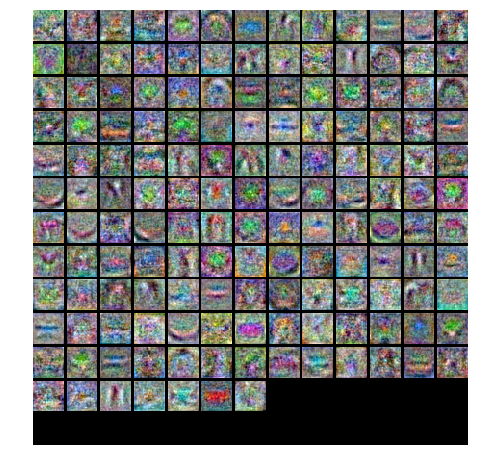

In [18]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [19]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.521


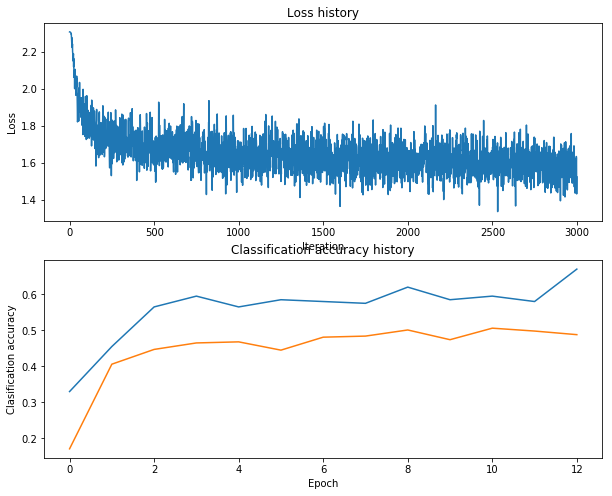

In [20]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()